# Machine Learning Intensive - S1 Representation

You need to read my theory lectures before practicing with this notebook:
- [Preclass S1](https://hackmd.io/@KylePaul/ML_Preclass_S1)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S1)

```{contents}

```

In [ ]:
# Use this cell if you use google colab to learn this book
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Experience PCA

### Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

### Explore the data

In [ ]:
# Download face data available from sklearn
dataset = datasets.fetch_lfw_people(min_faces_per_person=10, resize=0.8)
# Get the information of the images
num_image, h, w = dataset.images.shape

X = dataset["data"]

print("Number of images:", num_image)
print("Heigh of the image:", h)
print("Width of the image:", w)
print("X shape:", X.shape)

Number of images: 4324
Heigh of the image: 100
Width of the image: 75
X shape: (4324, 7500)


In [ ]:
print(X[0])
print(X[0].shape)

[0.40653595 0.37777779 0.29934642 ... 0.14509805 0.14901961 0.15686275]
(7500,)


In [ ]:
min(X[0]), max(X[0])

(0.06797386, 0.9921568)

### Visualize the data

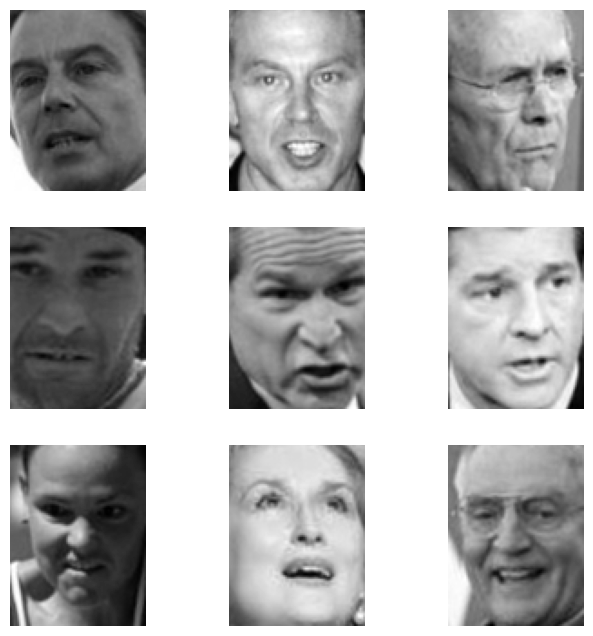

In [ ]:
n_row, n_col = 3, 3
fig, axs = plt.subplots(n_row, n_col, figsize=(8,8))
for row in range(n_row):
  for col in range(n_col):
    random_index = np.random.choice(num_image)
    axs[row][col].grid('off')
    axs[row][col].axis('off')
    axs[row][col].imshow(X[random_index].reshape(h,w), cmap='gray')
plt.show()

## Apply PCA and reconfirm the theory of PCA

**Note:**
- Since this face dataset is already standardized (features belong to the same scale), we do not need to apply StandardScaler again before using PCA (although the 2 normalization methods are different)
If you want to use StandardScaler, you need to un-normalize the above dataset first.

There are 3 ways to initialize PCA from `sklearn`:
- `pca=PCA()` uses all Principal Component, the number of components is equal to `min(num_sample, num_feature)`
- `pca=PCA(k)` where `k` is an integer, using only the first component `k`
- `pca=PCA(f)` where `f` is the real number, using only the number of principal components such that **percentage of information retained** approximates the original data `equals f`

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

- `pca.n_components_`: number of Principal Components in use
- `pca.components_`: Take out all the main components in the form of 1 matrix

In [ ]:
print('Number of Principal Components:', pca.n_components_)
print("Shape of Principal Components:", pca.components_.shape)

Number of Principal Components: 4324
Shape of Principal Components: (4324, 7500)


### Visualize Mean Face và các Principal Component

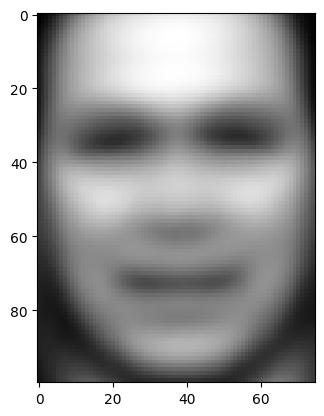

In [ ]:
mean_face = pca.mean_
plt.imshow(mean_face.reshape(h, w), cmap="gray")

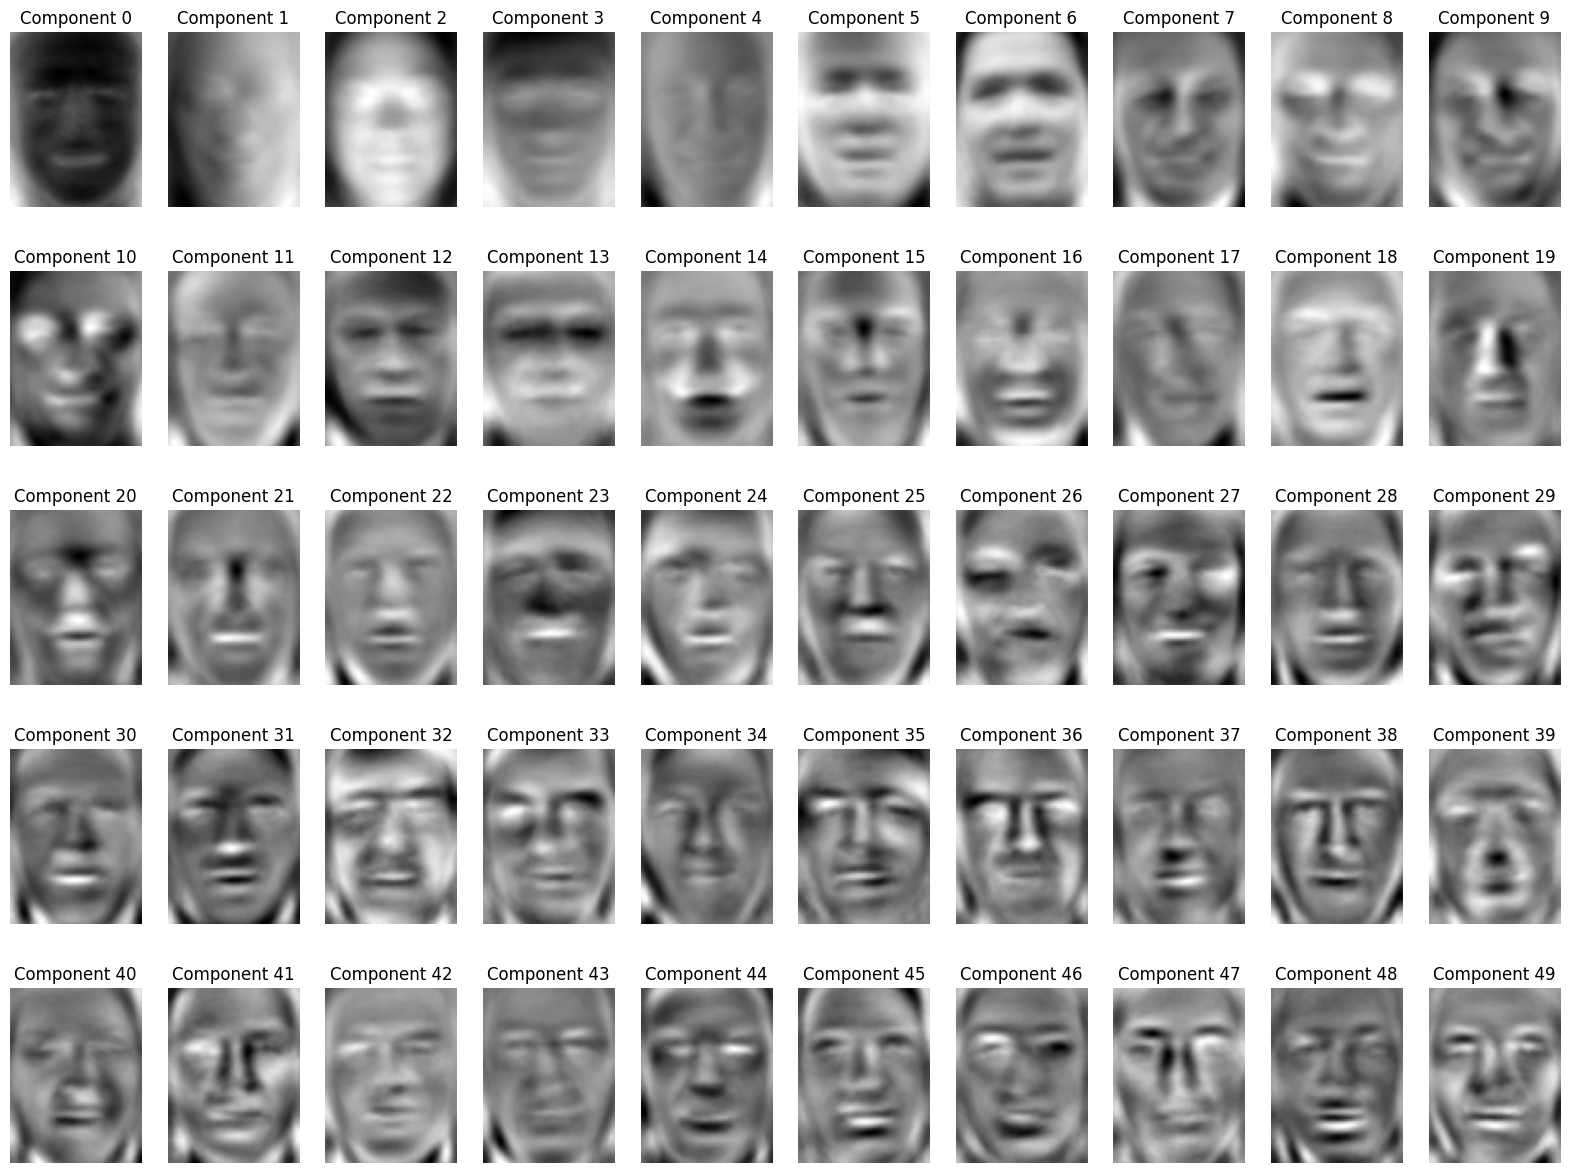

In [ ]:
# 50 first components
fig, axes = plt.subplots(5, 10, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
  ax.grid('off')
  ax.axis('off')
  ax.imshow(pca.components_[i].reshape(h,w), cmap='gray')
  ax.set_title('Component {}'.format(i))

#### TODO 1

Write code to prove that "the Principal Components are perpendicular to each other and are of magnitude 1"

In [ ]:
# random 2 integers as 2 indexes
index_1, index_2 = np.random.choice(pca.n_components_, size=2, replace=False)

# YOUR SOLUTION
dot = np.dot(pca.components_[index_1], pca.components_[index_2])
print(dot)
norm = np.linalg.norm(pca.components_[index_1])
print(norm)

-1.1875159e-09
1.0000002


#### TODO 2

Code to prove the below math formula:

$$\mathsf{Face} = \text{ Mean Face } + \sum_{i=1}^n w_i. \text{Face Principal Component } i\text{-th}$$

Then, calculate the mean squared error between the face reconstructed with the original face in the dataset.


In [ ]:
sample = X[0]
mean_face = pca.mean_
weights = pca.transform([sample])
U = pca.components_

print("Shape of sample:", sample.shape)
print("Shape of mean_face:", mean_face.shape)
print("Shape of weights / coefficient:", weights.shape)
print("Shape of components:", U.shape)

# YOUR SOLUTION
reconstruct = mean_face + np.dot(weights, U)
print(reconstruct.shape)

error = np.mean((sample - reconstruct)**2)
print("Reconstruction error (MSE):", error)

Shape of sample: (7500,)
Shape of mean_face: (7500,)
Shape of weights / coefficient: (1, 4324)
Shape of components: (4324, 7500)
(1, 7500)
Reconstruction error (MSE): 2.1218880552712534e-14


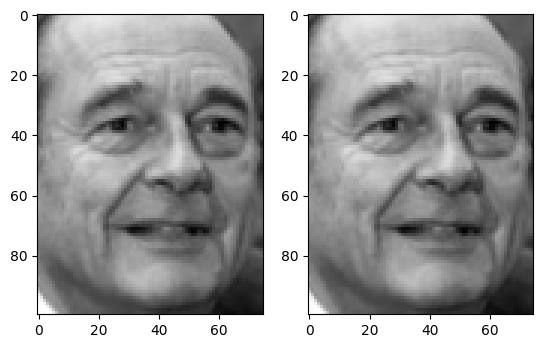

In [ ]:
fig = plt.subplot(1,2,1)
fig.imshow(sample.reshape(h, w), cmap="gray")
fig = plt.subplot(1,2,2)
fig.imshow(reconstruct.reshape(h, w), cmap="gray")
plt.show()

### Use n principal components to represent

Shape of weights: (1, 464)
Shape of components: (464, 7500)
Reconstruction error (MSE): 0.000633176867857955


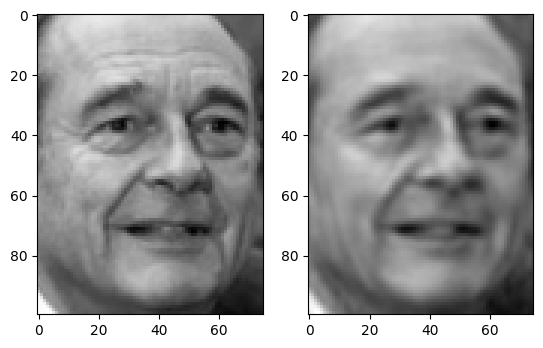

In [ ]:
n_components = 464
# n_components = 464 # 99% information

weights = pca.transform([sample])[:, 0:n_components]
print("Shape of weights:", weights.shape)
U = pca.components_[0:n_components,:]
print("Shape of components:", U.shape)

reconstruct = mean_face + np.dot(weights, U)

# reconstruction error
error = np.mean((sample - reconstruct)**2)
print("Reconstruction error (MSE):", error)

fig = plt.subplot(1,2,1)
fig.imshow(sample.reshape(h, w), cmap="gray")
fig = plt.subplot(1,2,2)
fig.imshow(reconstruct.reshape(h, w), cmap="gray")
plt.show()

### Use PCA to reduce the dimension of dataset

In [ ]:
import pandas as pd
import plotly.express as px

n_components = 3

x_pca = pca.transform(X)[:, 0:n_components]
df = pd.DataFrame({
    "image_id": list(range(x_pca.shape[0])),
    "principal_component_1": x_pca[:,0],
    "principal_component_2": x_pca[:,1],
    "principal_component_3": x_pca[:,2]
})

fig = px.scatter_3d(
    df,
    x="principal_component_1",
    y="principal_component_2",
    z="principal_component_3",
    hover_data=["image_id"]
)
fig.show()

## Word Embedding

### Download necessary libraries and modules

install `fasttext`

In [1]:
!pip install "git+https://github.com/facebookresearch/fastText.git"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-agduryvi
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fastText.git /tmp/pip-req-build-agduryvi
  Resolved https://github.com/facebookresearch/fastText.git to commit 48171ac6470f7b3638acc2699e0a370793d33fdd
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4384321 sha256=22f509f9cb9c5f8877e6bb1fab8ac0098a1baf0509d87c4b494d73764712cac0
  Stored in directory: /tmp/pip-ephem-wheel-cache-l_fj7kx3/wheels/3d/b7/8f/678f8b04408b579e2acad5f2416797aee4ebfe3529049a03b2
Successfully built fasttext


Install VNCoreNLP

In [ ]:
!pip install py_vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.9 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=776eb51c4f533c0563988aca62e81cc4fd894c75baa2a4f296da0c9a77233cec
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
# metric
# charts
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Test Word Embedding model for Vietnamese/English

In this session, we will experience 2 Word Embedding libraries
- `fasttext` library and Vietnamess Word Embedding of [Facebook](https://huggingface.co/facebook/fasttext-vi-vectors)
- `gensim` library:
  - English Word Embedding
  - Vietnamese Word Embedding [from one Vietnamese person](https://github.com/sonvx/word2vecVN)

### FastText

In [ ]:
import py_vncorenlp # word segmentor
import fasttext

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
segmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/Colab Notebooks/ML Public training/vncorenlp')

In [ ]:
text = "đẹp trai"
output = segmenter.word_segment(text)
print(output)

['đẹp_trai']


In [ ]:
ft = fasttext.load_model("/content/drive/MyDrive/Colab Notebooks/ML Public training/cc.vi.50.bin")

In [ ]:
text = "đẹp trai"
embedding = ft[segmenter.word_segment(text)[0]]
print(embedding)
print(type(embedding))

[-0.08987515  0.11855838 -0.041201   -0.08122422 -0.04498195 -0.07693475
  0.01601385 -0.10124682  0.03174876  0.03258704  0.02468052  0.00593183
 -0.01430611  0.04422166  0.02866276 -0.01971636  0.01052842  0.01453072
 -0.01432774 -0.08909895 -0.06839065 -0.03624108  0.06818447  0.06247804
 -0.11234589  0.06176881  0.04748557 -0.02569062 -0.02754932  0.00407921
 -0.00562474 -0.04759934 -0.01732392  0.03452192  0.01076003  0.02103091
  0.03082983  0.03875627  0.00951283 -0.03213377 -0.04992865  0.00212197
 -0.11983471 -0.00709106 -0.01203236 -0.01266732 -0.04353423 -0.00745085
  0.03781988 -0.0106875 ]
<class 'numpy.ndarray'>


#### TODO 3

Take out the embedding of the following letters, then convert the result into 1 matrix named `embeddings`

In [ ]:
texts = [
    'bóng đá', 'phạt đền', 'ghi bàn', 'tiền đạo',
    'rau', 'thịt', 'cá', 'sữa',
    'trường học', 'đại học', 'học sinh', 'giáo viên'
]

# YOUR SOLUTION
embeddings = [ft[segmenter.word_segment(text)[0]] for text in texts]
embeddings = np.array(embeddings)
embeddings.shape

(12, 50)

We can use the `cosine_similarity` function of `sklearn` to calculate the Cosine Similarity between each line in the matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similar_matrix = cosine_similarity(embeddings)

print(similar_matrix.shape)
print(similar_matrix)

(12, 12)
[[ 0.99999994  0.5370815   0.6809361   0.5956174   0.17513788  0.15145172
   0.23279269  0.17814872  0.4158453   0.39531448  0.35404694  0.3367773 ]
 [ 0.5370815   1.0000001   0.7851891   0.5918084   0.12167782  0.16239603
   0.27309468  0.01962926  0.06491542  0.02113368  0.17116939  0.19278052]
 [ 0.6809361   0.7851891   1.0000001   0.76776147  0.24208035  0.29387298
   0.28038484  0.18980674  0.15224628  0.14233187  0.30874464  0.33601955]
 [ 0.5956174   0.5918084   0.76776147  0.9999999   0.24747498  0.32955158
   0.2947828   0.16053522  0.13869898  0.21534397  0.28606734  0.3914165 ]
 [ 0.17513788  0.12167782  0.24208035  0.24747498  0.9999999   0.7940483
   0.59537864  0.66918397  0.30227205  0.15606026  0.25699806  0.26433304]
 [ 0.15145172  0.16239603  0.29387298  0.32955158  0.7940483   1.
   0.73795277  0.7408542   0.23822771  0.09961898  0.24591754  0.1716362 ]
 [ 0.23279269  0.27309468  0.28038484  0.2947828   0.59537864  0.73795277
   0.99999994  0.5514515   0.117

#### Quiz

In your opinion, what kind of graph can be used to represent the above `similar_matrix`?

<Axes: >

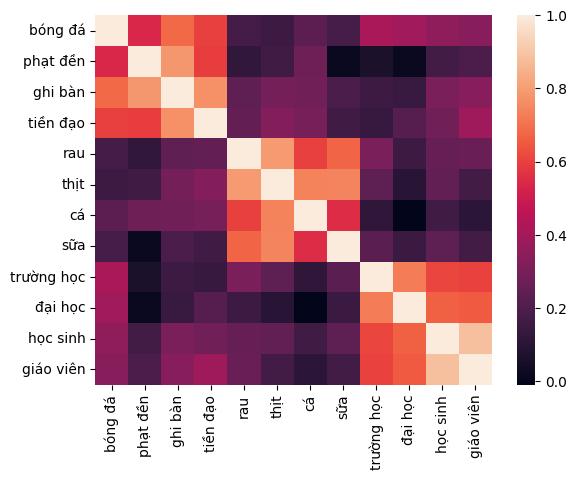

In [ ]:
# YOUR SOLUTION
sns.heatmap(similar_matrix, xticklabels=texts, yticklabels=texts)

### Gensim

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Tải và khởi tạo Word Embedding bằng thư viện gensim

In [ ]:
gs = api.load("glove-wiki-gigaword-50")
# đto create a model for Vietnamese, please uncomment this line
# gs = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/ML4AI_Shared/baomoi.vn.model.bin", binary=True)

[==================================================] 100.0% 66.0/66.0MB downloaded


#### Words Analogy

>If the word `A` corresponds to the word `B`, what does the word `C` correspond to?

- For example, if the word `man` corresponds to the word `king` then the word `woman` will correspond to the word `queen`
- Formula: `most_similar_with(king_vector - man_vector + woman_vector)`

In [ ]:
gs.most_similar(positive=['pizza','japan'], negative=['italy'])
#                              B        C                  A

[('sushi', 0.6840553879737854),
 ('snack', 0.6649713516235352),
 ('noodle', 0.6522372364997864),
 ('toy', 0.6270018219947815),
 ('oyster', 0.6267036199569702),
 ('tempura', 0.6250739097595215),
 ('candy', 0.6205143928527832),
 ('cracker', 0.6172831654548645),
 ('sandwich', 0.6168217658996582),
 ('fried', 0.6153010725975037)]

In [ ]:
gs.most_similar(positive=['doctor','woman'], negative=['man'])
#                           B        C                  A

[('nurse', 0.8404642939567566),
 ('child', 0.7663259506225586),
 ('pregnant', 0.7570130228996277),
 ('mother', 0.7517457604408264),
 ('patient', 0.7516663074493408),
 ('physician', 0.7507280707359314),
 ('dentist', 0.7360343933105469),
 ('therapist', 0.7342537045478821),
 ('parents', 0.7286345958709717),
 ('surgeon', 0.7165213227272034)]

#### Word Embedding and Bias

To find out the word (in a given list) that means the same thing to any word, we can use the function `most_similar_to_given`

Command
```python
most_similar_word = model.most_similar_to_given(my_word, list_of_words)
```


In [ ]:
gs.most_similar_to_given('animal', ['man', 'woman', 'dog', 'boy', 'girl'])

'dog'

In [ ]:
gs.most_similar_to_given('president', ['man', 'woman'])

'man'

In [ ]:
gs.most_similar_to_given('president', ['black', 'white'])

'white'

In [ ]:
texts = [
    'president', 'man', 'woman', 'black', 'white'
]

embeddings = [gs[text] for text in texts]
embeddings = np.array(embeddings)
similar_matrix = cosine_similarity(embeddings)
print(similar_matrix[0]) # cosine between president and the rest

[1.0000001  0.4430106  0.36247465 0.44236824 0.5438152 ]


<Axes: >

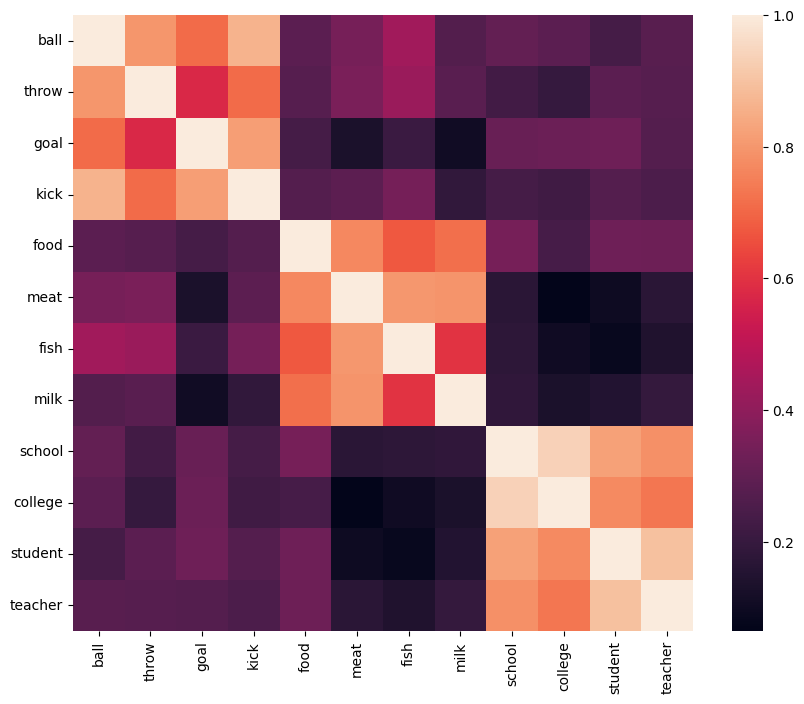

In [ ]:
texts = ['ball', 'throw', 'goal', 'kick', 'food', 'meat', 'fish', 'milk', 'school', 'college', 'student', 'teacher']
embeddings = [gs[text] for text in texts]
# plot_embeddings(embeddings, texts)
similar_matrix = cosine_similarity(embeddings)
plt.figure(figsize=(10,8))
sns.heatmap(similar_matrix, xticklabels=texts, yticklabels=texts)

### Use PCA to reduce the data dimensions

In [ ]:
from sklearn.decomposition import PCA

texts = ['ball', 'throw', 'goal', 'kick', 'vegetable', 'meat', 'fish', 'milk', 'school', 'college', 'student', 'teacher']
embeddings = [gs[text] for text in texts]

pca = PCA(3).fit(embeddings)
embedding_3d = pca.transform(embeddings)

print("Lượng thông tin được giữ lại khi dùng 3 PC:", pca.explained_variance_ratio_)

fig = px.scatter_3d(x=embedding_3d[:, 0], y=embedding_3d[:, 1], z=embedding_3d[:, 2], color=texts)
fig.show()

Lượng thông tin được giữ lại khi dùng 3 PC: [0.41415636 0.29151177 0.0708928 ]


In [ ]:
import pandas as pd

groups = [
    "sport", "sport", "sport", "sport",
    "food", "food", "food", "food",
    "education", "education", "education", "education"
]

df = pd.DataFrame({
    "x": embedding_3d[:, 0],
    "y": embedding_3d[:, 1],
    "z": embedding_3d[:, 2],
    "text": texts,
    "group": groups
})

fig = px.scatter_3d(df, x="x", y="y", z="z", color="group", hover_data=["text"])
fig.show()


#### Quiz

Observing the graph above, suppose there is 1 new word "burger", where will this word "burger" be located?